Problem statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.To
build an multiple linear regression model for the prediction of demand for shared bikes.
 The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


In [310]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [311]:
# importing needed library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for better enhanced visualization
# importing model essential library

import statsmodels
import statsmodels.api as sm # for building the linear regression model using statsmodel
import sklearn  # for various needed tool
from sklearn.model_selection import train_test_split # train_test_split for splitting data into training & test data set
from sklearn.preprocessing import MinMaxScaler    # use for Re-scaling
from statsmodels.stats.outliers_influence import variance_inflation_factor # use for multicolinearity
from sklearn.metrics import r2_score # for evaluting model we build at the end



## Reading and understanding Data....


In [312]:
# storing dataset of day.csv in day Variable
day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 Data set AI Ml new/day.csv')
# looking into day head
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [313]:
day.windspeed.value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [314]:
day.shape # shape of day (dataframe variable)


(730, 16)

In [315]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [316]:
# No Null Value/missing value found --- so,no need to impute/Remove col/rows from dataset

In [317]:
# all index
day.index

RangeIndex(start=0, stop=730, step=1)

In [318]:
# all columns header with each dtypes
print(day.columns)
print(day.dtypes)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [319]:
day.describe(include='dtype') #dteday

dteday
count          730
unique         730
top     01-01-2018
freq             1

In [320]:
day.describe() #statistical fact about numerical Vars only

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Data Visualization

<Axes: xlabel='season', ylabel='cnt'>

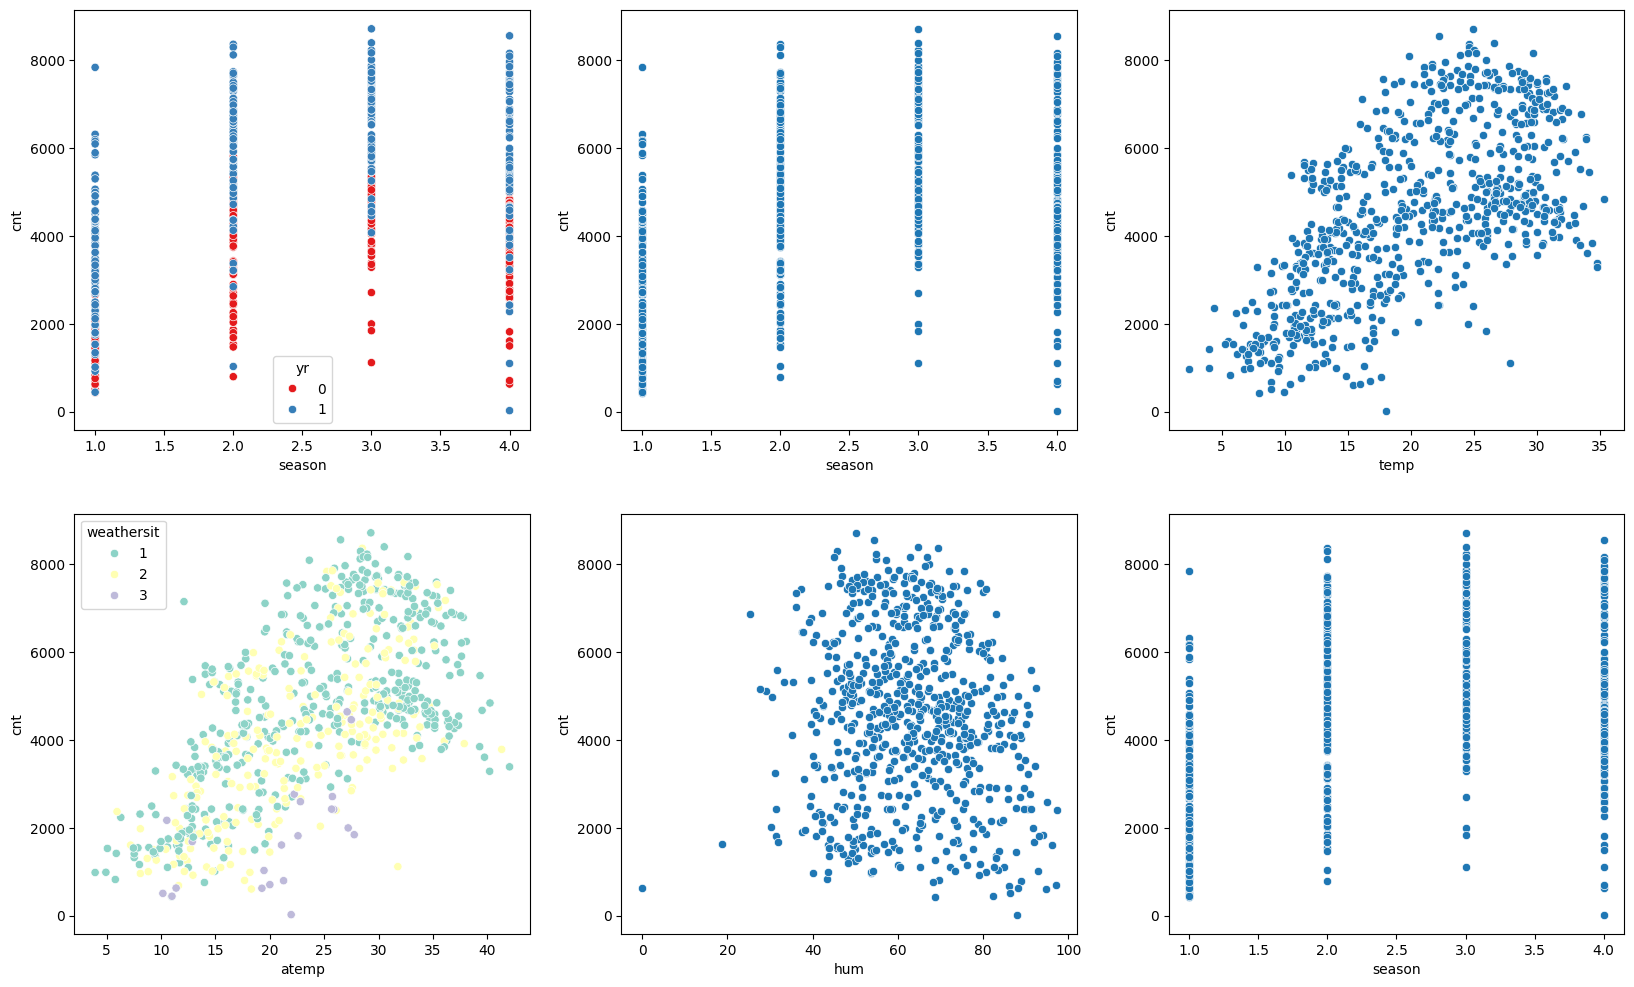

In [321]:
#Bivariate analysis (numerical vs numerical) (season,weathersit,temp,atemp,hum,windspeed VS cnt)
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
#season vs cnt with hue as yr
sns.scatterplot(x = 'season', y = 'cnt', data=day, hue='yr', palette='Set1')
#season vs cnt with no hue
plt.subplot(2,3,2)
sns.scatterplot(x = 'season', y = 'cnt', data=day, palette='Set1')

#temp vs cnt
plt.subplot(2,3,3)
sns.scatterplot(x = 'temp', y = 'cnt', data=day, palette='Set2')
#atemp vs cnt with hue as weathersit
plt.subplot(2,3,4)
sns.scatterplot(x = 'atemp', y = 'cnt', data=day, hue='weathersit', palette='Set3')

#hum vs cnt
plt.subplot(2,3,5)
sns.scatterplot(x = 'hum', y = 'cnt', data=day, palette='Set2')
#windspeed vs cnt
plt.subplot(2,3,6)
sns.scatterplot(x = 'season', y = 'cnt', data=day, palette='Set1')





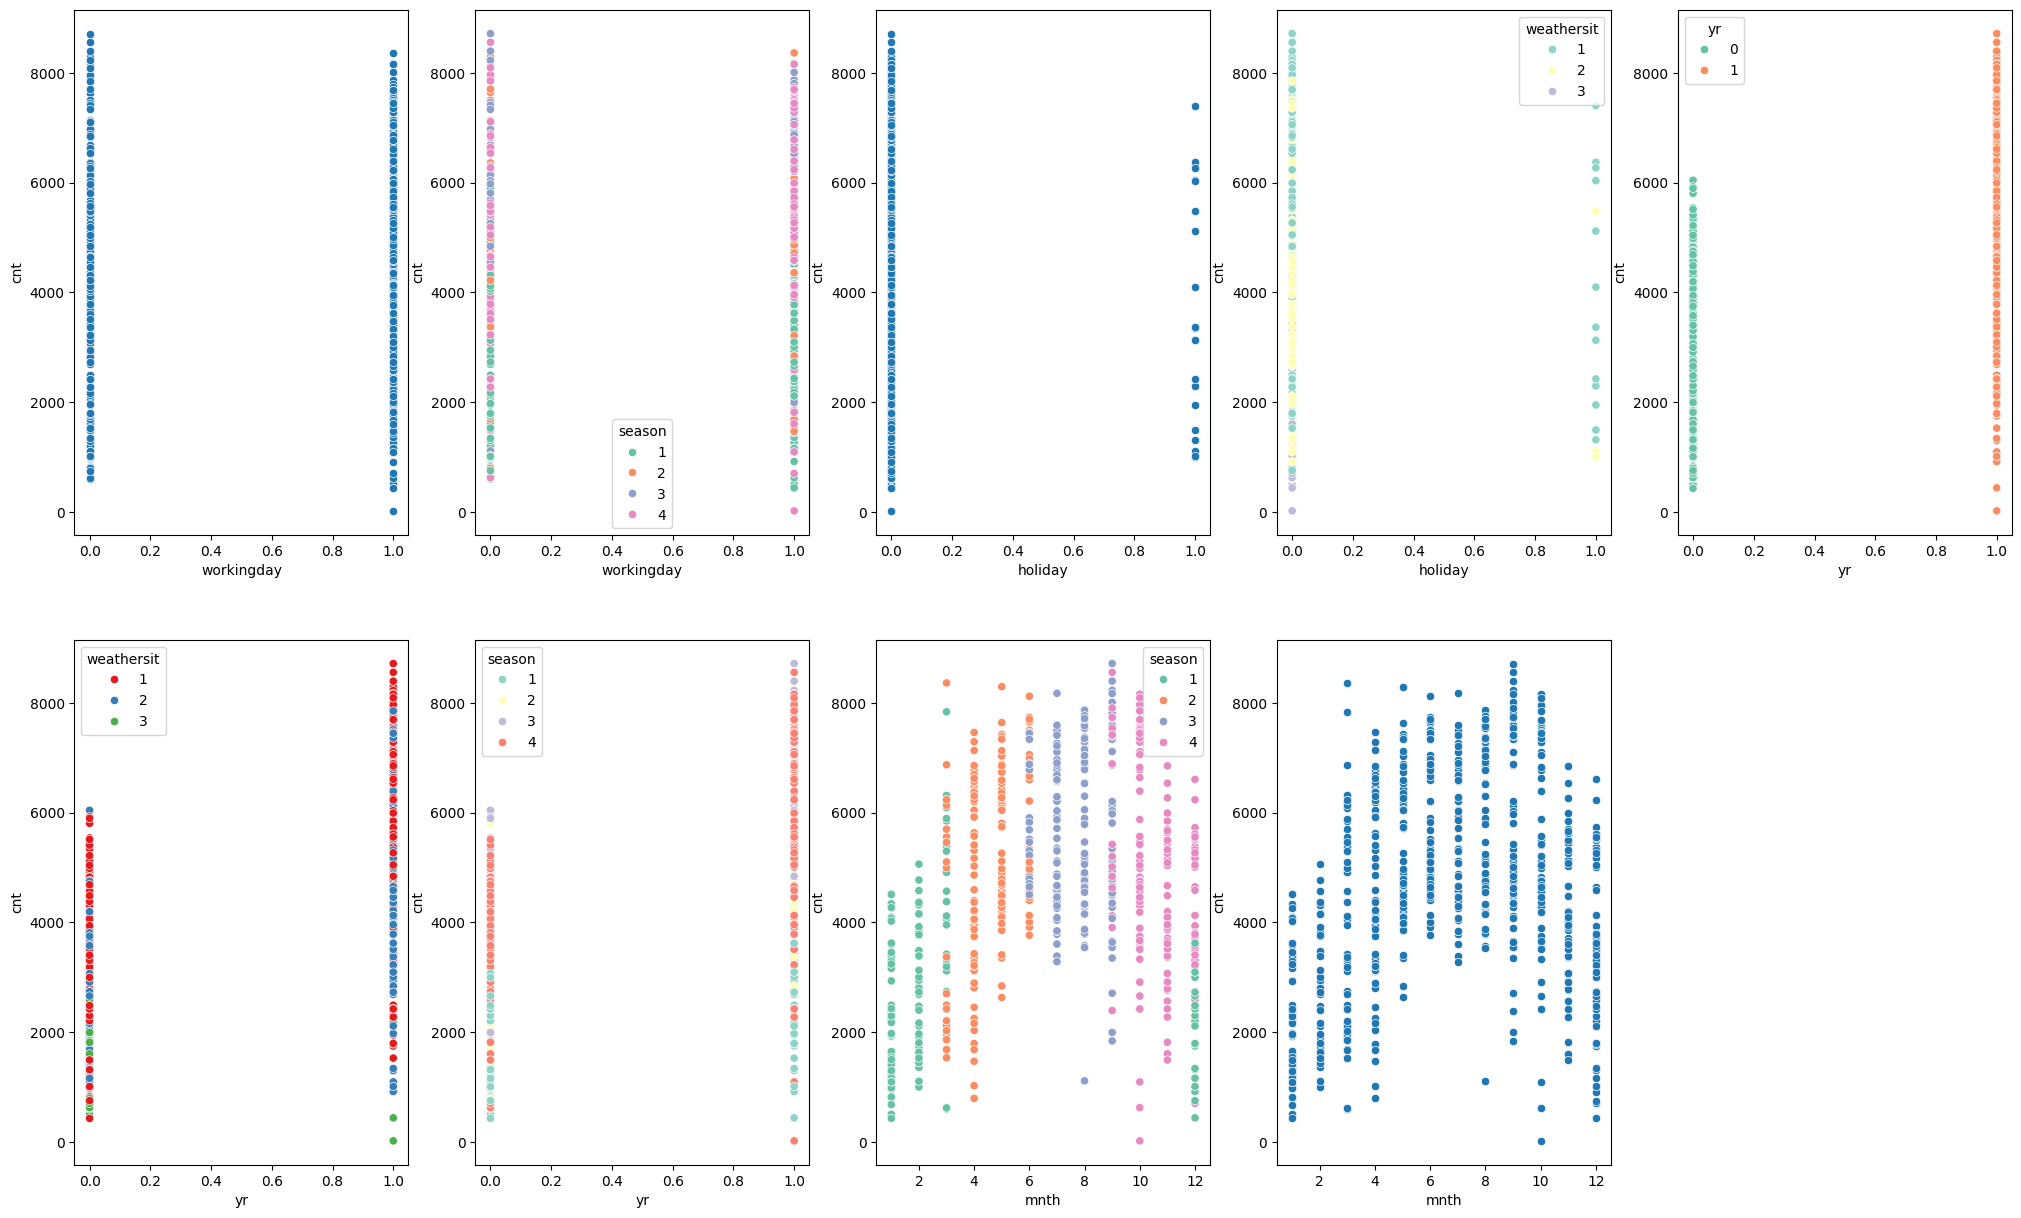

In [322]:
# Above bivariate analysis continue from here

plt.figure(figsize=(25, 15))
plt.subplot(2,5,1)
#working day vs cnt without hue
sns.scatterplot(x = 'workingday', y = 'cnt', data=day,palette='Set3')
#working day vs cnt with hue as season
plt.subplot(2,5,2)
sns.scatterplot(x = 'workingday', y = 'cnt', data=day, hue='season', palette='Set2')

#holiday vs cnt without hue
plt.subplot(2,5,3)
sns.scatterplot(x = 'holiday', y = 'cnt', data=day, palette='Set1')
#holiday vs cnt with hue as season
plt.subplot(2,5,4)
sns.scatterplot(x = 'holiday', y = 'cnt', data=day, hue='weathersit', palette='Set3')

#yr vs cnt with yr as hue
plt.subplot(2,5,5)
sns.scatterplot(x = 'yr', y = 'cnt', data=day, hue='yr', palette='Set2')
# yr vs cnt with hue as weathersit
plt.subplot(2,5,6)
sns.scatterplot(x = 'yr', y = 'cnt', data=day, hue='weathersit', palette='Set1')
#yr vs cnt with hues as season
plt.subplot(2,5,7)
sns.scatterplot(x = 'yr', y = 'cnt', data=day, hue='season', palette='Set3')


#mnth vs cnt with hue as season
plt.subplot(2,5,8)
sns.scatterplot(x = 'mnth', y = 'cnt', data=day, hue='season', palette='Set2')
#mnth vs cnt without hue
plt.subplot(2,5,9)
sns.scatterplot(x = 'mnth', y = 'cnt', data=day, palette='Set3')
plt.show()

*changes

In [323]:
df=day.drop(columns=['instant','dteday','casual','registered'],axis=1)

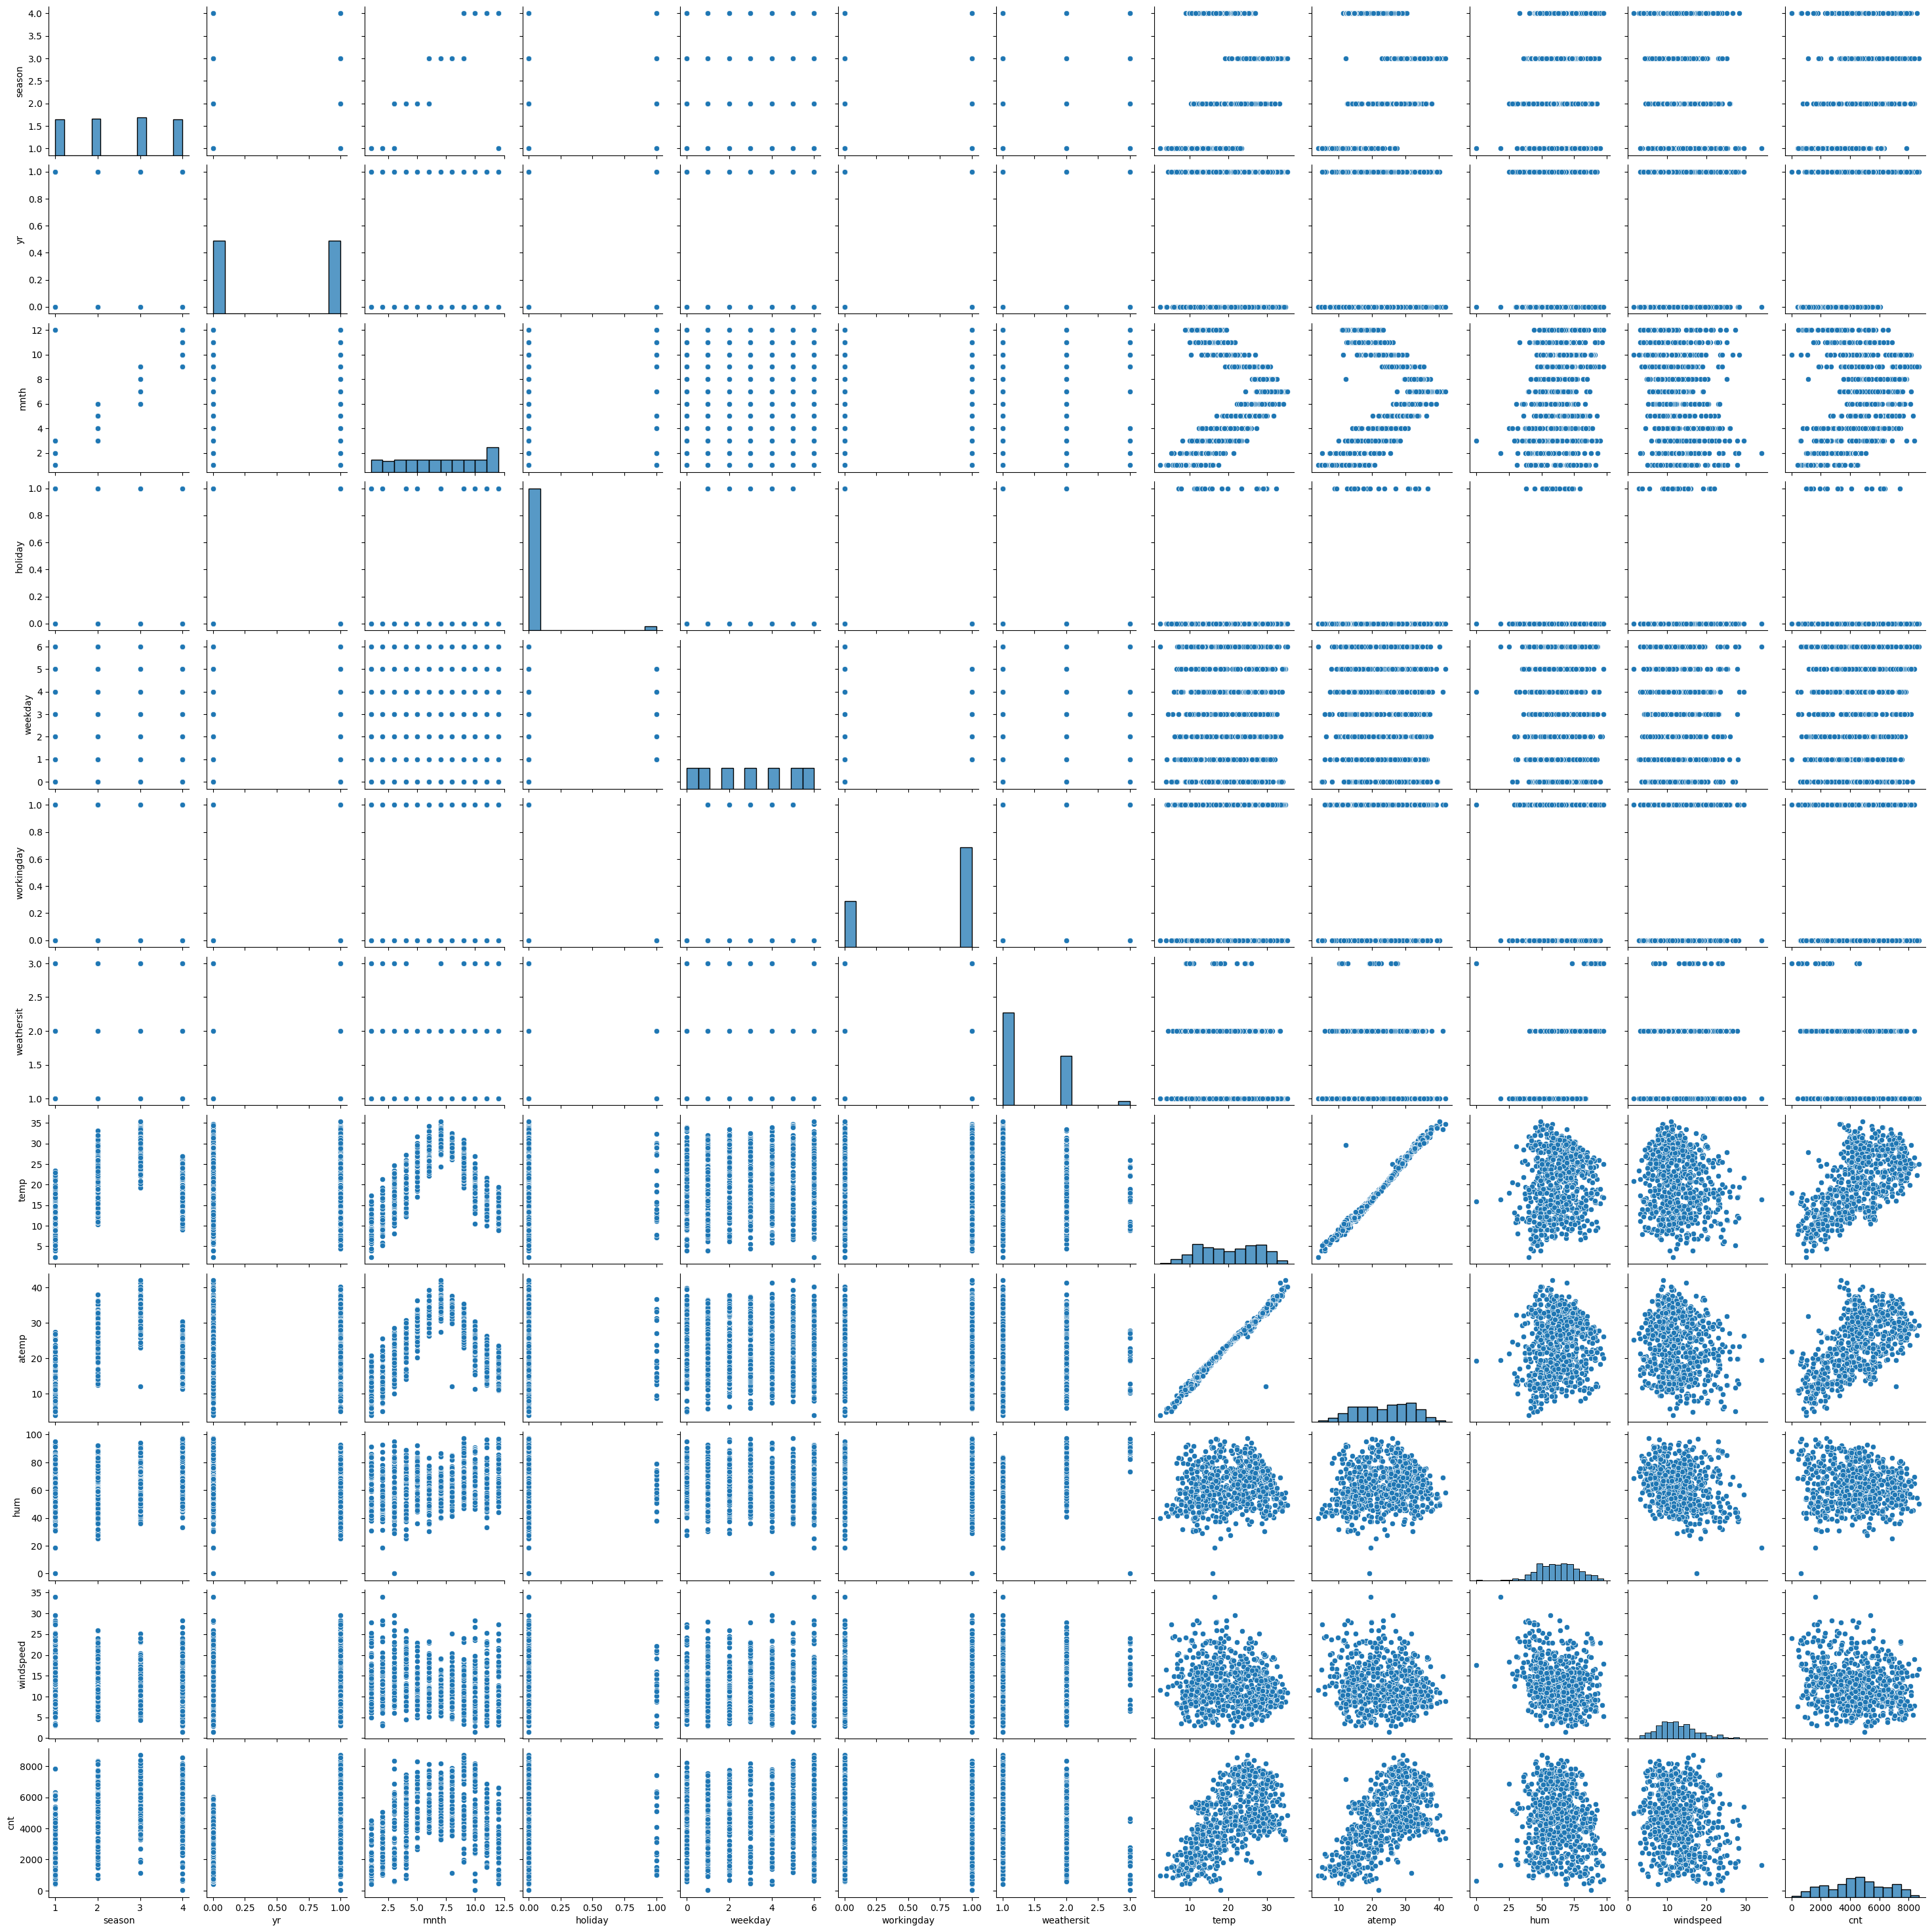

In [324]:
# relationship of all the  day dataset (excluding instant','dteday','casual','registered) plotting with no hue
sns.color_palette("cool")
sns.pairplot(df)
plt.show()

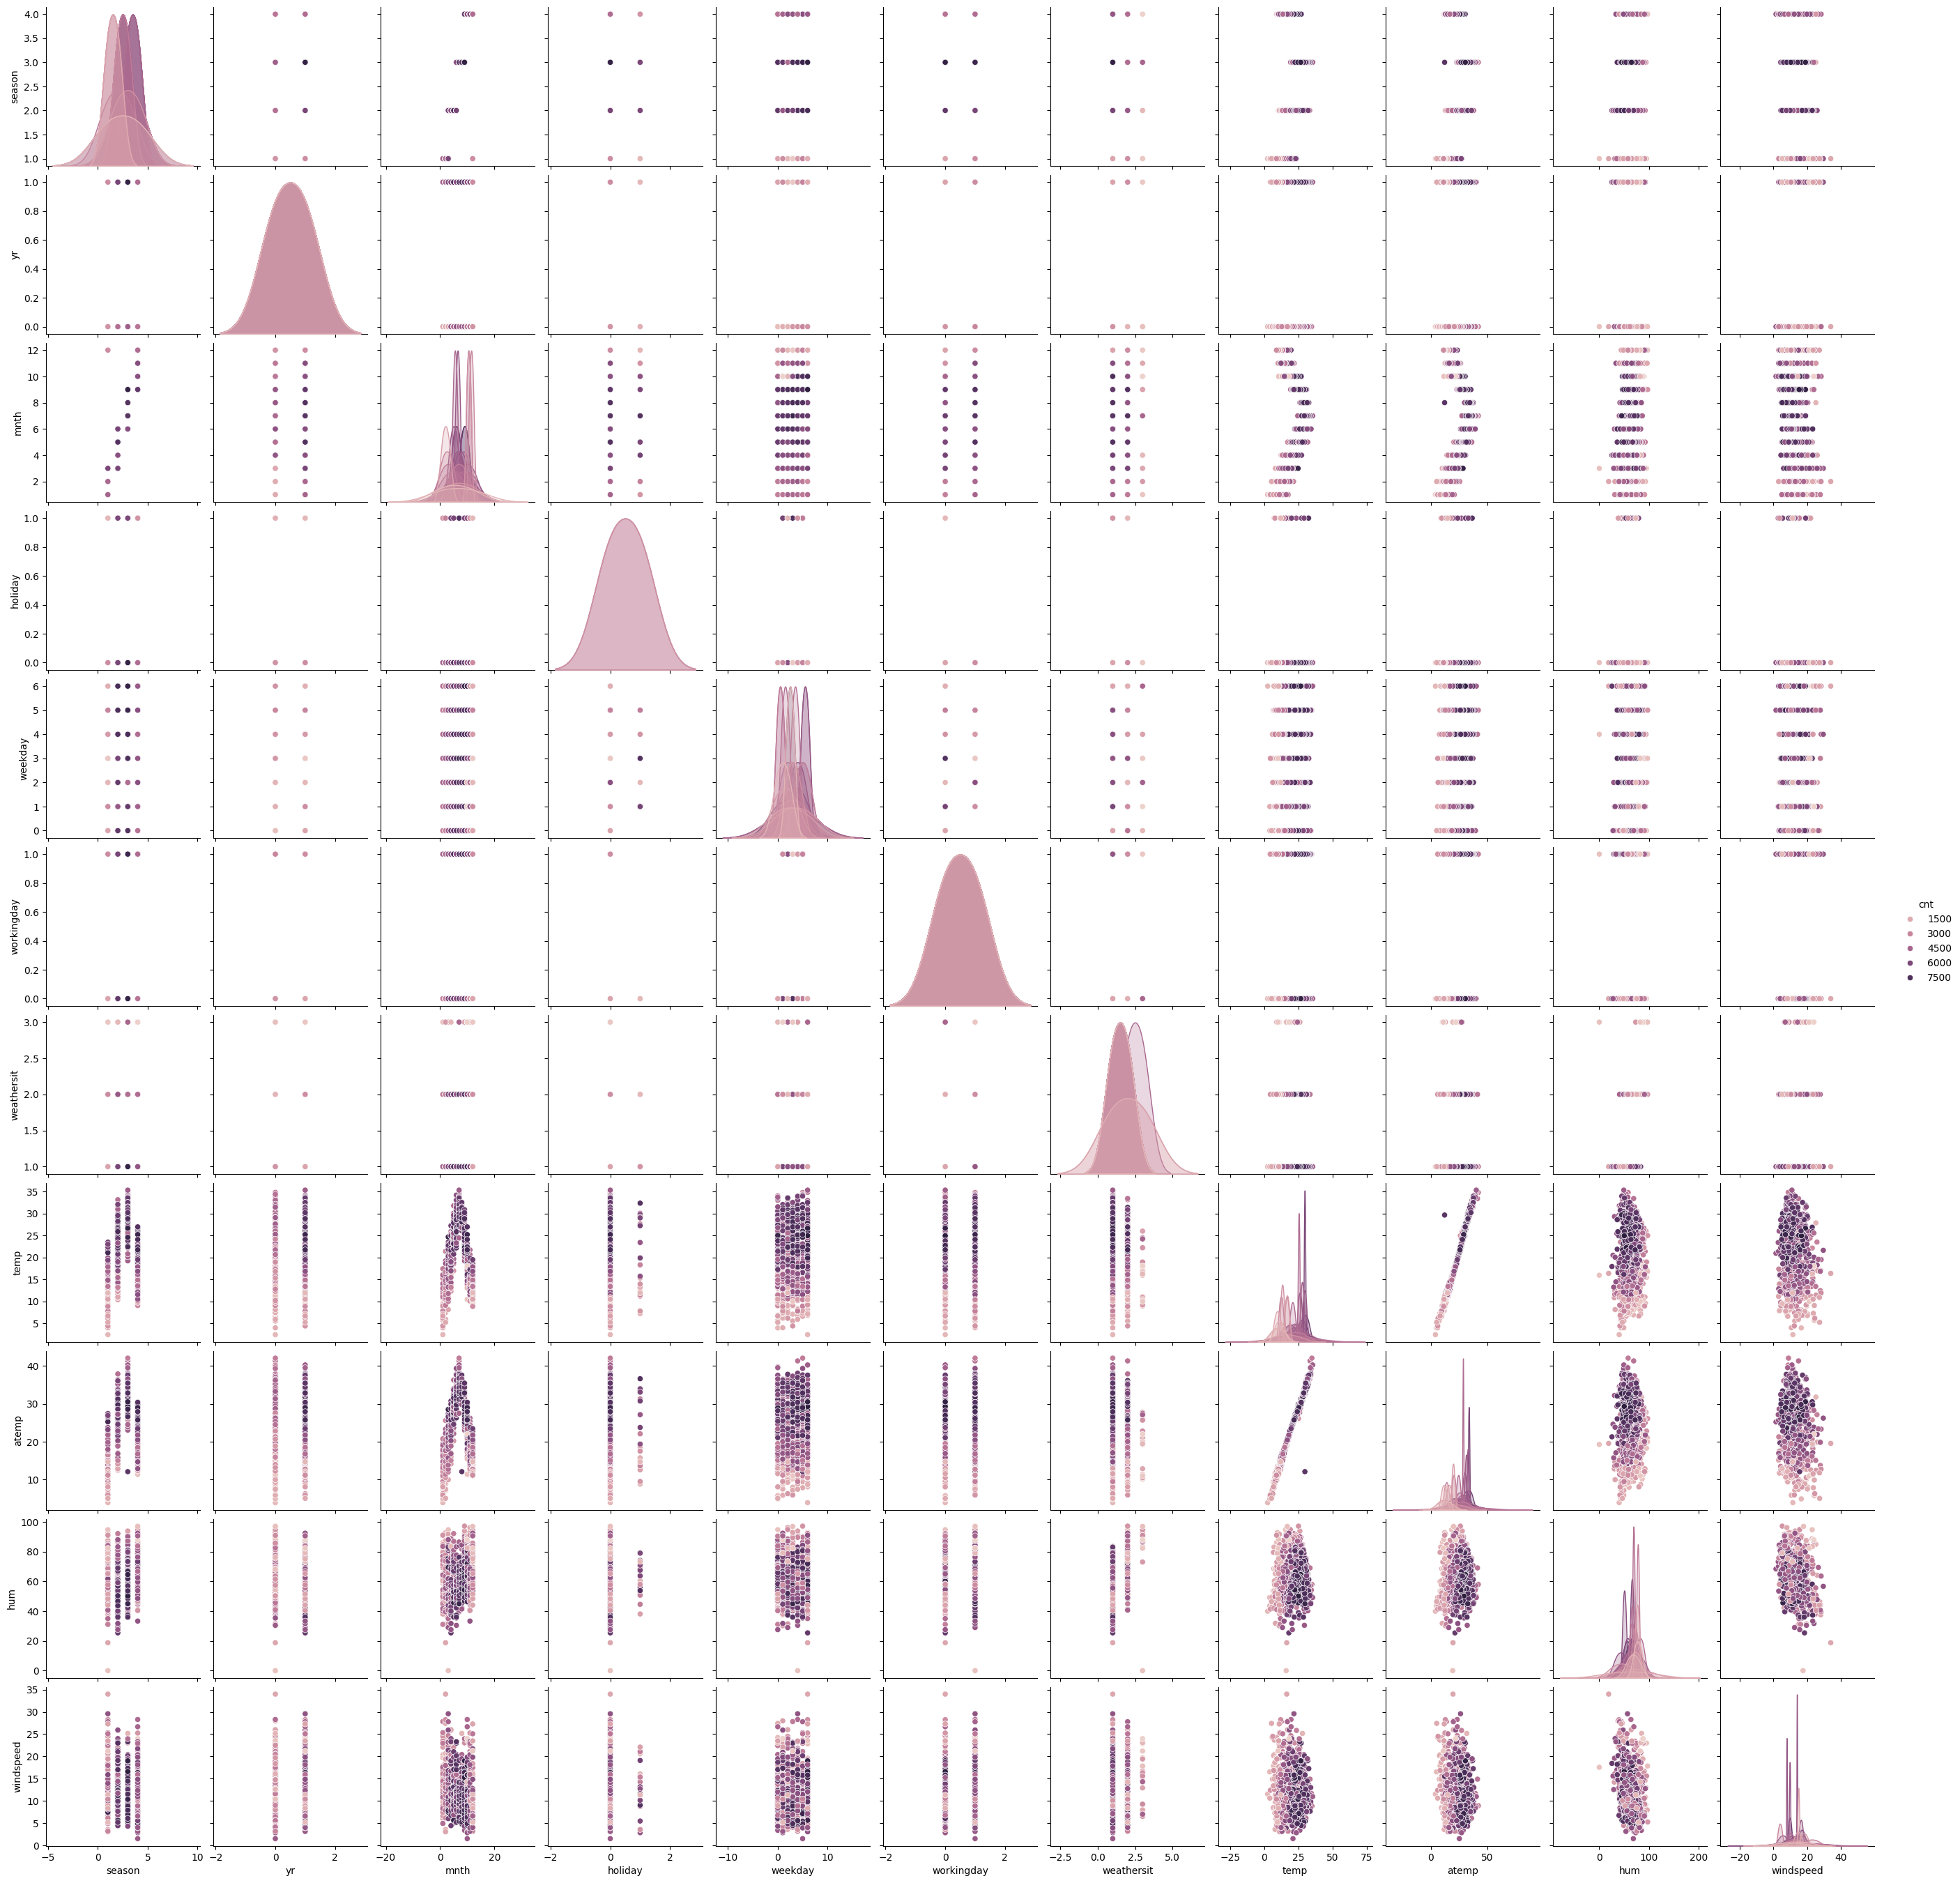

In [325]:
# relationship of all the  day dataset (excluding instant','dteday','casual','registered) plotting with cnt as hue
sns.color_palette("Set3")
sns.pairplot(df,hue='cnt')
plt.show()

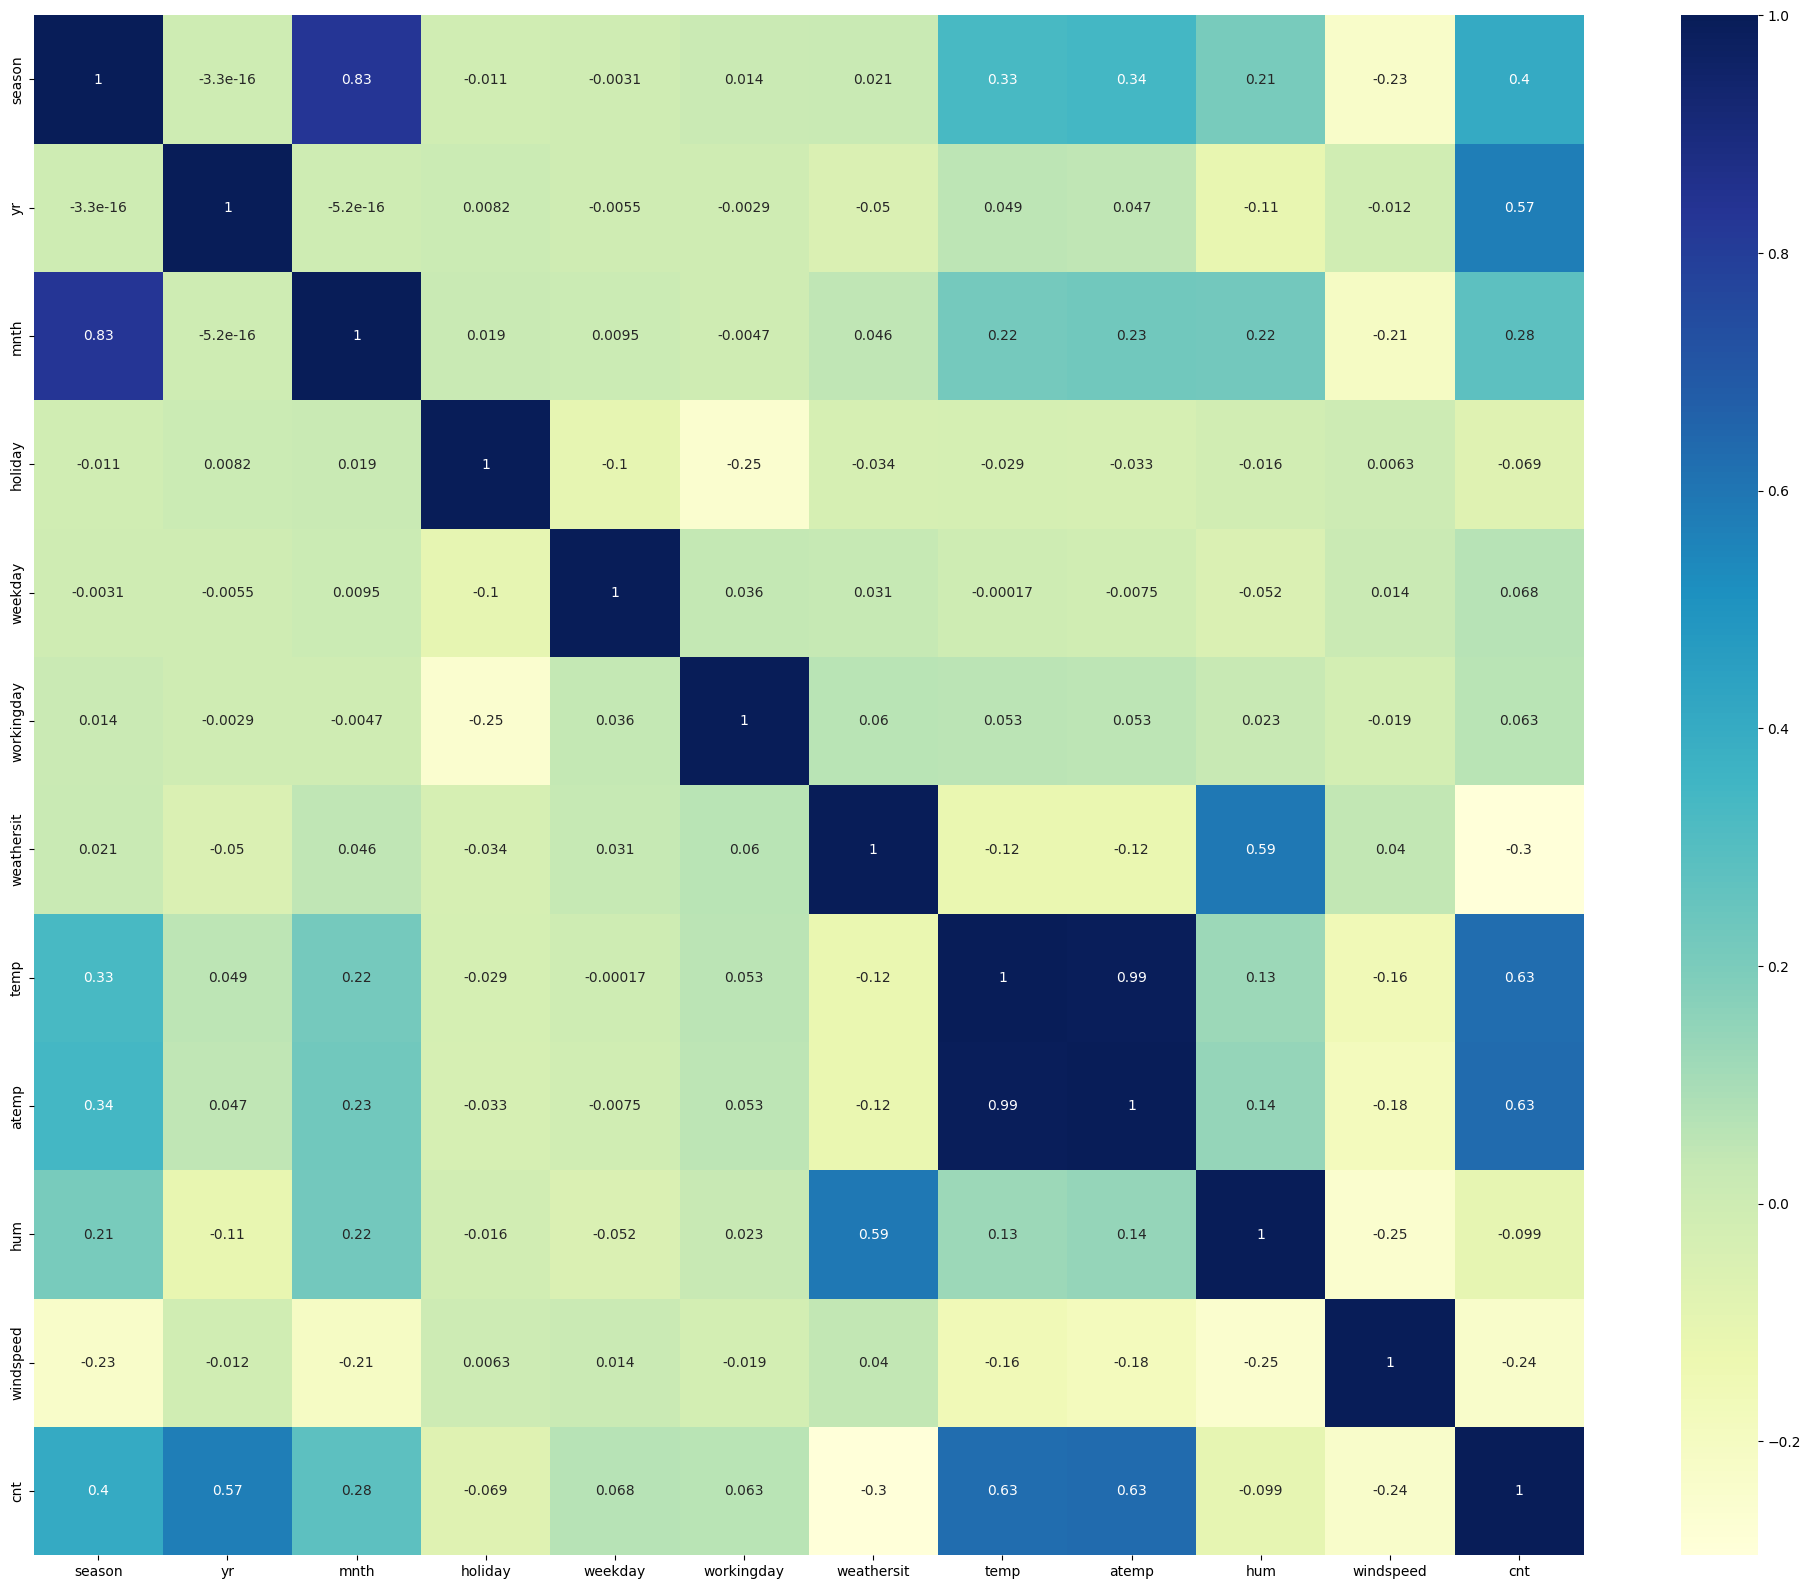

In [326]:
# heat map
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

some observation :-
- Bike demand in the fall is the highest.
- Bike demand takes a dip in spring.
- Bike demand in year 2019 is higher as compared to 2018.
- Bike demand is high in the months from May to October.
- The demand of bike is almost similar throughout the weekdays.
- Bike demand doesn't change whether day is working day or not

Also we Did not visualize
- the instant(it did not add any meaning)
- dteday(we have mnth,weekday,yr cols that represent same info)
-casual & registered (as these both cols is contained by cnt column )

> Most correlated with cnt is temp & atemp (0.63 or 63%)


## FRom now we will use " df " dataset variable for Model Building

#Manual model feature selection 1. model-I & 2. model-II

### Data Preparation(pre-processing)

- step-1(Encoding): ---(type of pre processing-encoding ) -categorical Variabale with Yes or NO (i.e.covertinh them to binary Vars), first we  do that Yes replace with 1 and NO with 0 and
     ---Creating other categorical variabe to Dummy Variable.
 - step-2: Test - Train Split
 - step3: also Re-scaling of variable (via min-max (normalising))


In [327]:
# step -1:There are no categorical variable, so there is no need of converting them to Binary Vars as they are already in binary form(/encoded form)
 # let skip step -1
 # let start here ---

In [328]:
#@title step-2: split train and test in (70:30) ratio:
df_train, df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape) # df_train is our training data set
print(df_test.shape) # # df_test is our testing data set

(510, 12)
(219, 12)


 'df_train' is our training data set and 'df_test' is our test data set

In [329]:
#@title rescaling
#normalisisation(data is between mapped to 0 & 1)
#x-xmin/ xmax-xmin
#staderasiation(mean = , sigma 0)
#(x - mu)/sigma

# we choose MIN-MAX i.e Normalising
# 1. Instantiate an object
scaler = MinMaxScaler()

# creat a list of numeric Vaiable because you do not want to REscale Binary coverted Variable(i.e yr,holiday,workingday,) (ONLY numerica Vars)
df_num = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']

#2. fit the object
#scaler.fit

df_train[df_num]=scaler.fit_transform(df_train[df_num])
df_train.head()


season  yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000   1  0.818182        0  0.333333           1         0.0   
576  0.666667   1  0.545455        0  0.333333           1         0.0   
426  0.000000   1  0.181818        0  1.000000           0         0.5   
728  0.000000   1  1.000000        0  0.000000           0         0.0   
482  0.333333   1  0.272727        0  1.000000           0         0.5   

         temp     atemp       hum  windspeed       cnt  
653  0.509887  0.501133  0.575354   0.300794  0.864243  
576  0.815169  0.766351  0.725633   0.264686  0.827658  
426  0.442393  0.438975  0.640189   0.255342  0.465255  
728  0.245101  0.200348  0.498067   0.663106  0.204096  
482  0.395666  0.391735  0.504508   0.188475  0.482973



```
# fit(): want to be learn xmin,xmax
# tranform(): x-xmin/xmax-xmin
#fit_tranform(): both of fit & tranform
```



In [330]:
df_train.describe() # statistical fact of training dataset

season          yr        mnth     holiday     weekday  workingday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.505882    0.507843    0.504456    0.025490    0.498366    0.676471   
std      0.370649    0.500429    0.315338    0.157763    0.336182    0.468282   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.333333    0.000000    0.181818    0.000000    0.166667    0.000000   
50%      0.666667    1.000000    0.545455    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.818182    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  
count   510.00000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean      0.20098    0.537262    0.512989    0.650369    0.320768    0.513620  
std       0.27377    0.225844    0.212385    0.145882    0.169797    0.224593  
min       0.00000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%       0.00000    0.339853    0.332086    0.538643    0.199179    0.356420  
50%       0.00000    0.540519    0.526811    0.653714    0.296763    0.518638  
75%       0.50000    0.735215    0.688457    0.754830    0.414447    0.684710  
max       1.00000    1.000000    1.000000    1.000000    1.000000    1.000000

heat map of df_train Training Data set


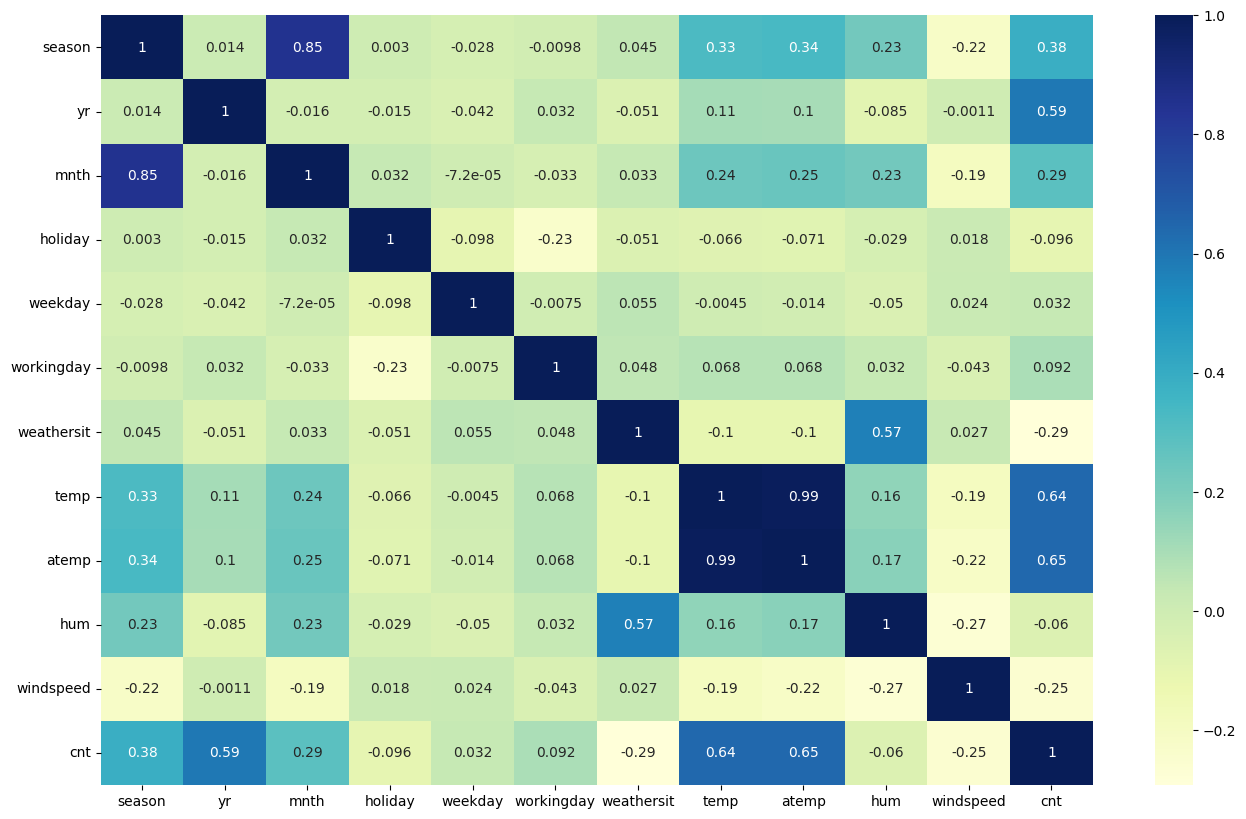

In [331]:
# heat map of df_train Training Data set
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

# Building model-I (Top up)

In [332]:
# x_train y_train
y_train = df_train.pop('cnt')
x_train = df_train

In [333]:
# add constant
x_train_sm = sm.add_constant(x_train['temp']) # only using AREA Vars as Predictable variable
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.80e-61
Time:                        14:29:18   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.40 R^2

In [334]:
# 40 % variance/model is explained by temp Vars but we want to increase
# so we are adding Vars i.e atemp
# add constant
x_train_sm = x_train[['temp','atemp']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.95e-60
Time:                        14:29:21   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [335]:
# 41% variance explained by model
# add constant
x_train_sm = x_train[['temp','atemp','yr']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.62e-130
Time:                        14:29:29   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.000       0.043       0.102
temp           0.0763      0.169      0.451      0.652      -0.256       0.408
atemp          0.5450      0.180      3.032      0.003       0.192       0.898
yr             0.2377      0.011     21.471      0.000       0.216       0.259
==============================================================================
Omnibus:                       37.600   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.841
Skew:                          -0.544   Prob(JB):                     7.49e-13
Kurtosis:                       4.201   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [336]:
# 69 % Variance explained by model
# add constant
x_train_sm = x_train[['temp','atemp','yr','season']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     344.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.32e-143
Time:                        14:29:34   Log-Likelihood:                 374.06
No. Observations:                 510   AIC:                            -738.1
Df Residuals:                     505   BIC:                            -717.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0468      0.014      3.240      0.001       0.018       0.075
temp           0.1234      0.159      0.776      0.438      -0.189       0.436
atemp          0.4232      0.170      2.495      0.013       0.090       0.756
yr             0.2395      0.010     23.016      0.000       0.219       0.260
season         0.1222      0.015      8.229      0.000       0.093       0.151
==============================================================================
Omnibus:                       97.089   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.846
Skew:                          -0.951   Prob(JB):                     9.20e-55
Kurtosis:                       5.845   Cond. No.                         66.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [337]:
# 73.2% variance explained by model
# add constant
x_train_sm = x_train[['temp','atemp','yr','season','mnth']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     275.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.62e-141
Time:                        14:29:38   Log-Likelihood:                 374.19
No. Observations:                 510   AIC:                            -736.4
Df Residuals:                     504   BIC:                            -711.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      0.015      3.210      0.001       0.019       0.080
temp           0.1222      0.159      0.768      0.443      -0.190       0.435
atemp          0.4234      0.170      2.495      0.013       0.090       0.757
yr             0.2393      0.010     22.953      0.000       0.219       0.260
season         0.1339      0.028      4.854      0.000       0.080       0.188
mnth          -0.0159      0.032     -0.503      0.615      -0.078       0.046
==============================================================================
Omnibus:                       97.382   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.010
Skew:                          -0.951   Prob(JB):                     3.12e-55
Kurtosis:                       5.862   Cond. No.                         70.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
# same 73.2%
# add constant
x_train_sm = x_train[['temp','atemp','yr','season','mnth','weekday']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.05e-142
Time:                        14:29:42   Log-Likelihood:                 378.51
No. Observations:                 510   AIC:                            -743.0
Df Residuals:                     503   BIC:                            -713.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0265      0.017      1.539      0.124      -0.007       0.060
temp           0.0920      0.158      0.581      0.561      -0.219       0.403
atemp          0.4550      0.169      2.696      0.007       0.123       0.787
yr             0.2405      0.010     23.226      0.000       0.220       0.261
season         0.1379      0.027      5.033      0.000       0.084       0.192
mnth          -0.0200      0.031     -0.639      0.523      -0.082       0.042
weekday        0.0450      0.015      2.931      0.004       0.015       0.075
==============================================================================
Omnibus:                      103.219   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.046
Skew:                          -1.027   Prob(JB):                     1.86e-55
Kurtosis:                       5.765   Cond. No.                         73.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [339]:
# 73.6%
# add constant
x_train_sm = x_train[['temp','atemp','yr','season','mnth','weekday','workingday']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.23e-141
Time:                        14:29:46   Log-Likelihood:                 380.20
No. Observations:                 510   AIC:                            -744.4
Df Residuals:                     502   BIC:                            -710.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0139      0.018      0.754      0.451      -0.022       0.050
temp           0.0913      0.158      0.578      0.564      -0.219       0.402
atemp          0.4525      0.168      2.687      0.007       0.122       0.783
yr             0.2401      0.010     23.234      0.000       0.220       0.260
season         0.1372      0.027      5.015      0.000       0.083       0.191
mnth          -0.0177      0.031     -0.566      0.572      -0.079       0.044
weekday        0.0452      0.015      2.947      0.003       0.015       0.075
workingday     0.0201      0.011      1.830      0.068      -0.001       0.042
==============================================================================
Omnibus:                       99.644   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.009
Skew:                          -0.979   Prob(JB):                     1.89e-55
Kurtosis:                       5.832   Cond. No.                         80.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [340]:
# 73.8%
# add constant
x_train_sm = x_train[['temp','atemp','yr','season','mnth','weekday','workingday','holiday']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.10e-141
Time:                        14:29:49   Log-Likelihood:                 381.50
No. Observations:                 510   AIC:                            -745.0
Df Residuals:                     501   BIC:                            -706.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0202      0.019      1.068      0.286      -0.017       0.057
temp           0.1002      0.158      0.635      0.526      -0.210       0.410
atemp          0.4407      0.168      2.618      0.009       0.110       0.771
yr             0.2400      0.010     23.262      0.000       0.220       0.260
season         0.1359      0.027      4.974      0.000       0.082       0.190
mnth          -0.0153      0.031     -0.491      0.624      -0.077       0.046
weekday        0.0425      0.015      2.763      0.006       0.012       0.073
workingday     0.0160      0.011      1.417      0.157      -0.006       0.038
holiday       -0.0538      0.034     -1.597      0.111      -0.120       0.012
==============================================================================
Omnibus:                      101.503   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.167
Skew:                          -0.994   Prob(JB):                     5.28e-57
Kurtosis:                       5.872   Cond. No.                         80.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
#73.9%
# add constant
x_train_sm = x_train[['temp','atemp','yr','season','mnth','weekday','workingday','weathersit']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.36e-165
Time:                        14:29:52   Log-Likelihood:                 437.91
No. Observations:                 510   AIC:                            -857.8
Df Residuals:                     501   BIC:                            -819.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0570      0.017      3.363      0.001       0.024       0.090
temp           0.0963      0.141      0.682      0.496      -0.181       0.374
atemp          0.4141      0.151      2.750      0.006       0.118       0.710
yr             0.2360      0.009     25.529      0.000       0.218       0.254
season         0.1555      0.025      6.346      0.000       0.107       0.204
mnth          -0.0249      0.028     -0.889      0.374      -0.080       0.030
weekday        0.0538      0.014      3.923      0.000       0.027       0.081
workingday     0.0267      0.010      2.714      0.007       0.007       0.046
weathersit    -0.1914      0.017    -11.279      0.000      -0.225      -0.158
==============================================================================
Omnibus:                       73.797   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.794
Skew:                          -0.724   Prob(JB):                     1.37e-42
Kurtosis:                       5.641   Cond. No.                         80.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
# 79.1%
# add constant
x_train_sm = x_train[['temp','atemp','yr','season','mnth','weekday','workingday','weathersit','windspeed']]
x_train_sm = sm.add_constant(x_train_sm)
# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     223.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.29e-169
Time:                        14:29:55   Log-Likelihood:                 450.40
No. Observations:                 510   AIC:                            -880.8
Df Residuals:                     500   BIC:                            -838.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1171      0.020      5.726      0.000       0.077       0.157
temp           0.2207      0.140      1.575      0.116      -0.055       0.496
atemp          0.2654      0.150      1.769      0.078      -0.029       0.560
yr             0.2367      0.009     26.207      0.000       0.219       0.254
season         0.1471      0.024      6.133      0.000       0.100       0.194
mnth          -0.0273      0.027     -1.001      0.317      -0.081       0.026
weekday        0.0543      0.013      4.048      0.000       0.028       0.081
workingday     0.0249      0.010      2.583      0.010       0.006       0.044
weathersit    -0.1897      0.017    -11.443      0.000      -0.222      -0.157
windspeed     -0.1394      0.028     -5.010      0.000      -0.194      -0.085
==============================================================================
Omnibus:                       67.478   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.763
Skew:                          -0.696   Prob(JB):                     2.03e-35
Kurtosis:                       5.362   Cond. No.                         83.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, we get :
 - R squared = 0.801
- variance explained by model = 80.1%

##we will not use model-I futher

# Building Model -II (Bottom up)

In [343]:
# Building model wirh all the Vars
x_train_sm = sm.add_constant(x_train)

# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.96e-169
Time:                        14:30:10   Log-Likelihood:                 455.82
No. Observations:                 510   AIC:                            -887.6
Df Residuals:                     498   BIC:                            -836.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.032      5.659      0.000       0.118       0.244
season         0.1444      0.024      6.066      0.000       0.098       0.191
yr             0.2346      0.009     26.083      0.000       0.217       0.252
mnth          -0.0178      0.027     -0.652      0.515      -0.071       0.036
holiday       -0.0689      0.029     -2.355      0.019      -0.126      -0.011
weekday        0.0478      0.013      3.562      0.000       0.021       0.074
workingday     0.0193      0.010      1.971      0.049    5.95e-05       0.039
weathersit    -0.1619      0.021     -7.717      0.000      -0.203      -0.121
temp           0.2171      0.139      1.560      0.119      -0.056       0.491
atemp          0.2763      0.149      1.850      0.065      -0.017       0.570
hum           -0.0939      0.041     -2.264      0.024      -0.175      -0.012
windspeed     -0.1573      0.029     -5.487      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       64.012   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.857
Skew:                          -0.673   Prob(JB):                     1.29e-32
Kurtosis:                       5.258   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c

In [344]:
# write code for ...VIF
#@title VIF
vif = pd.DataFrame() # creating new data frame
vif['features'] = x_train.columns # fierst cols of df
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range (x_train.shape[1])]
vif['VIF']= round(vif['VIF'], 2) # 2nd cols
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

features     VIF
8        atemp  346.98
7         temp  333.20
9          hum   16.09
2         mnth   13.32
0       season   11.30
10   windspeed    3.74
5   workingday    3.14
4      weekday    3.03
6   weathersit    2.19
1           yr    2.01
3      holiday    1.09

VIF =5 i.e mean
5 =1/(1-r2)
1- r2 = 0.2
r2 =0.8 which very high i.e 80 %  below is threshold is passed

In [345]:
#Droping criterion             comfirm Drop --->         - 1. High p-value & High vif
#Deciding this DRopping Criterion (choice) -->-2.LOw p-value & high vif  OR High p-value & Low vif
 #  passing criterion                --->           -3.low p-value & vif-value

>High p-value & VIF of droping one at a time

In [346]:
x = x_train.drop('atemp', axis=1) # dropping atemp


In [347]:
#comfirming the drop
x.head(3)

season  yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000   1  0.818182        0  0.333333           1         0.0   
576  0.666667   1  0.545455        0  0.333333           1         0.0   
426  0.000000   1  0.181818        0  1.000000           0         0.5   

         temp       hum  windspeed  
653  0.509887  0.575354   0.300794  
576  0.815169  0.725633   0.264686  
426  0.442393  0.640189   0.255342

In [348]:
#Droped atemp
x_train_sm = sm.add_constant(x)

# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.84e-169
Time:                        14:30:27   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1858      0.032      5.820      0.000       0.123       0.249
season         0.1456      0.024      6.107      0.000       0.099       0.192
yr             0.2345      0.009     26.011      0.000       0.217       0.252
mnth          -0.0180      0.027     -0.659      0.510      -0.072       0.036
holiday       -0.0713      0.029     -2.434      0.015      -0.129      -0.014
weekday        0.0465      0.013      3.456      0.001       0.020       0.073
workingday     0.0192      0.010      1.952      0.051      -0.000       0.038
weathersit    -0.1644      0.021     -7.834      0.000      -0.206      -0.123
temp           0.4714      0.022     21.582      0.000       0.428       0.514
hum           -0.0878      0.041     -2.120      0.034      -0.169      -0.006
windspeed     -0.1662      0.028     -5.868      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       57.074   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.433
Skew:                          -0.613   Prob(JB):                     2.13e-28
Kurtosis:                       5.120   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
# VIF again
vif = pd.DataFrame() # creating new data frame
vif['features'] = x.columns # fierst cols of df
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
vif['VIF']= round(vif['VIF'], 2) # 2nd cols
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

features    VIF
8         hum  15.29
2        mnth  13.32
0      season  11.30
7        temp   7.95
9   windspeed   3.66
5  workingday   3.14
4     weekday   3.03
6  weathersit   2.17
1          yr   2.01
3     holiday   1.09

In [350]:
# droping current hig p & vif value mnth is p=0.51 & vif=13.32
x = x.drop('mnth', axis=1)

In [351]:
#comfirming the drop
x.head(3)

season  yr  holiday   weekday  workingday  weathersit      temp  \
653  1.000000   1        0  0.333333           1         0.0  0.509887   
576  0.666667   1        0  0.333333           1         0.0  0.815169   
426  0.000000   1        0  1.000000           0         0.5  0.442393   

          hum  windspeed  
653  0.575354   0.300794  
576  0.725633   0.264686  
426  0.640189   0.255342

In [352]:
# drop the mnth

x_train_sm = sm.add_constant(x)

# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
lr_model.params
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.47e-170
Time:                        14:30:36   Log-Likelihood:                 453.85
No. Observations:                 510   AIC:                            -887.7
Df Residuals:                     500   BIC:                            -845.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1845      0.032      5.794      0.000       0.122       0.247
season         0.1325      0.013     10.141      0.000       0.107       0.158
yr             0.2347      0.009     26.060      0.000       0.217       0.252
holiday       -0.0722      0.029     -2.469      0.014      -0.130      -0.015
weekday        0.0459      0.013      3.424      0.001       0.020       0.072
workingday     0.0194      0.010      1.972      0.049    6.71e-05       0.039
weathersit    -0.1633      0.021     -7.810      0.000      -0.204      -0.122
temp           0.4727      0.022     21.749      0.000       0.430       0.515
hum           -0.0907      0.041     -2.205      0.028      -0.172      -0.010
windspeed     -0.1665      0.028     -5.881      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       56.392   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.747
Skew:                          -0.607   Prob(JB):                     4.95e-28
Kurtosis:                       5.109   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [353]:
# vif again
# VIF again
vif = pd.DataFrame() # creating new data frame
vif['features'] = x.columns # fierst cols of df
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
vif['VIF']= round(vif['VIF'], 2) # 2nd cols
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

features    VIF
7         hum  14.35
6        temp   7.89
8   windspeed   3.65
0      season   3.39
4  workingday   3.14
3     weekday   3.01
5  weathersit   2.14
1          yr   2.01
2     holiday   1.09

 There are now no High  p-value (and highest current p-value is workingday=0.049)
 , but there are 2 high vif value
 >Low p-value & high VIF(i.e currently temp=7.89 & hum=14.35)


so,decide should we Remove/drop 'hum', let decide from seeing the heat-map and then decide on droping or not

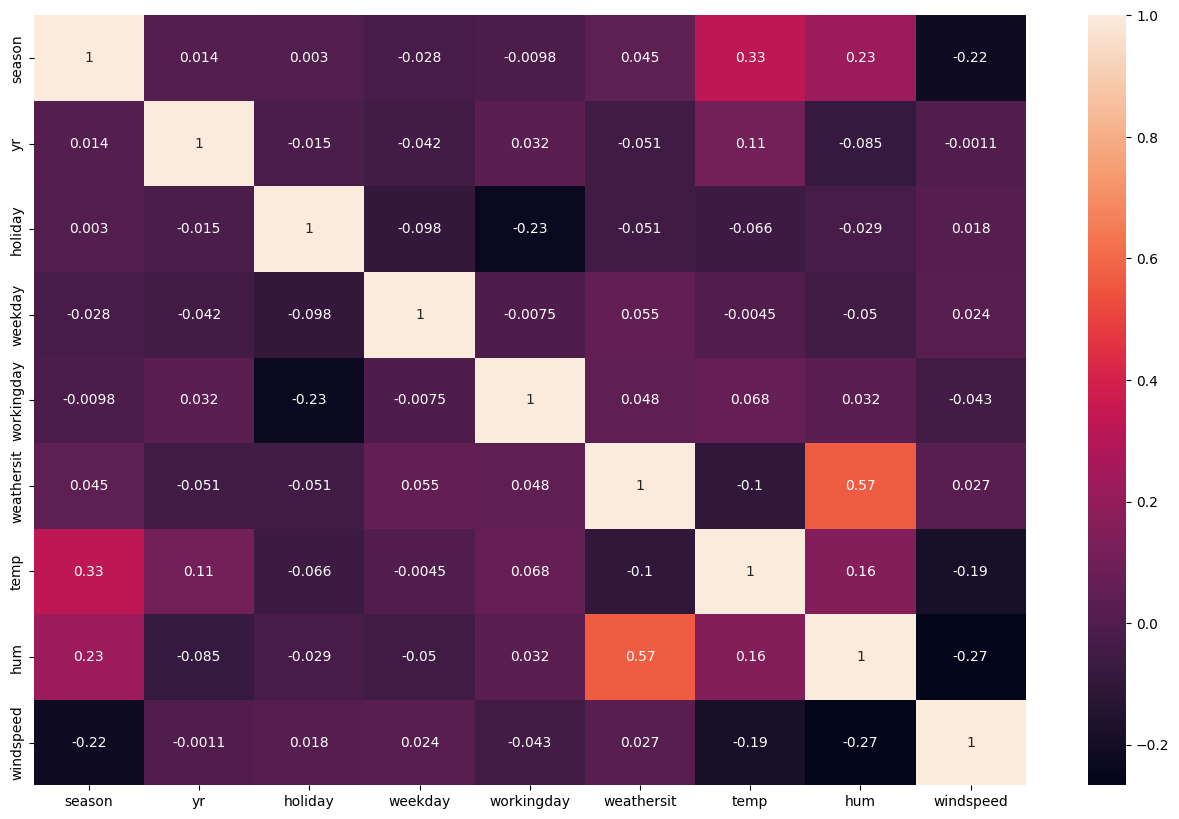

In [354]:
#heat map
# heat map of x Training Data set
plt.figure(figsize=(16,10))
sns.heatmap(x.corr(), annot = True, cmap='rocket')
plt.show()

we, can see that hum has correlation with 1.hum & weathersit=0.57, 2.weathersit & hum=0.57 ...so, we have decided to drop hum

In [355]:
# let us Drop hum with(p-value =0.028 (p< 0.05) & VIF=14.35)
x = x.drop('hum', axis=1)

In [356]:
#comfirming the drop
x.head(3)

season  yr  holiday   weekday  workingday  weathersit      temp  \
653  1.000000   1        0  0.333333           1         0.0  0.509887   
576  0.666667   1        0  0.333333           1         0.0  0.815169   
426  0.000000   1        0  1.000000           0         0.5  0.442393   

     windspeed  
653   0.300794  
576   0.264686  
426   0.255342

In [357]:
# drop the hum

x_train_sm = sm.add_constant(x)

# creat first model
lr = sm.OLS(y_train, x_train_sm)
#fit
lr_model = lr.fit()
#params
print(lr_model.params)
#summary
print(lr_model.summary())

const         0.129072
season        0.128878
yr            0.236715
holiday      -0.072363
weekday       0.048906
workingday    0.019721
weathersit   -0.191627
temp          0.464158
windspeed    -0.148376
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.98e-171
Time:                        14:30:56   Log-Likelihood:                 451.38
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     501   BIC:                            -846.7
Df Model:                           8                                         
Covariance Type:            nonrobust                              

In [358]:
# again VIF
# VIF again
vif = pd.DataFrame() # creating new data frame
vif['features'] = x.columns # fierst cols of df
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
vif['VIF']= round(vif['VIF'], 2) # 2nd cols
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

features   VIF
6        temp  5.80
7   windspeed  3.31
0      season  3.15
4  workingday  2.92
3     weekday  2.86
1          yr  2.00
5  weathersit  1.53
2     holiday  1.07

`**so, you can see we have achived all low p-value & VIF**`
>ABOVE is the Final MODEL and will use for making prediction and Evaluation at the end.



```

```

##residual analysis

In [359]:
y_train_pred = lr_model.predict(x_train_sm)

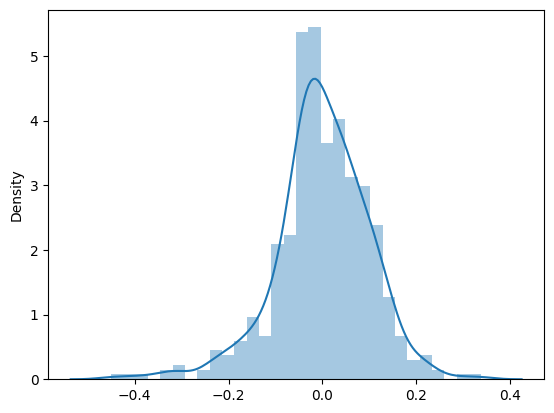

In [360]:
# normally distribution of residual analysis
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

##Make ** Prediction**
-  before that do Test (pre-processing)



```
#fit= TRain
#tranform() - test
```



In [361]:
num_df  = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']
#transform the object
#scaler.transform
df_test[num_df]=scaler.transform(df_test[num_df])


In [362]:
# see
df_test.head(4)

season  yr      mnth  holiday   weekday  workingday  weathersit  \
184  0.666667   0  0.545455        1  0.166667           0         0.5   
535  0.333333   1  0.454545        0  0.500000           1         0.0   
299  1.000000   0  0.818182        0  0.666667           1         0.5   
221  0.666667   0  0.636364        0  0.500000           1         0.0   

         temp     atemp       hum  windspeed       cnt  
184  0.831783  0.769660  0.657364   0.084219  0.692706  
535  0.901354  0.842587  0.610133   0.153728  0.712034  
299  0.511964  0.496145  0.837699   0.334206  0.303382  
221  0.881625  0.795343  0.437098   0.339570  0.547400

In [363]:
df_test.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.485540    0.479452    0.497717    0.036530    0.503044    0.698630   
std      0.369821    0.500722    0.311080    0.188034    0.331402    0.459904   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.272727    0.000000    0.166667    0.000000   
50%      0.333333    0.000000    0.454545    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.727273    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.187215    0.558941    0.532991    0.638508    0.313350    0.520592  
std      0.269422    0.233698    0.217888    0.148974    0.159947    0.218435  
min      0.000000    0.046591    0.025950    0.261915   -0.042808    0.048205  
25%      0.000000    0.354650    0.344751    0.527265    0.198517    0.377531  
50%      0.000000    0.558691    0.549198    0.627737    0.299459    0.524275  
75%      0.500000    0.759096    0.714132    0.743928    0.403048    0.672745  
max      1.000000    0.984424    0.980934    1.002146    0.807474    0.963300

In [364]:
#@title make prediction
y_test = df_test.pop('cnt')
x_test = df_test

In [365]:
# add constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

const    season  yr      mnth  holiday   weekday  workingday  weathersit  \
184    1.0  0.666667   0  0.545455        1  0.166667           0         0.5   
535    1.0  0.333333   1  0.454545        0  0.500000           1         0.0   
299    1.0  1.000000   0  0.818182        0  0.666667           1         0.5   
221    1.0  0.666667   0  0.636364        0  0.500000           1         0.0   
152    1.0  0.333333   0  0.454545        0  0.666667           1         0.0   

         temp     atemp       hum  windspeed  
184  0.831783  0.769660  0.657364   0.084219  
535  0.901354  0.842587  0.610133   0.153728  
299  0.511964  0.496145  0.837699   0.334206  
221  0.881625  0.795343  0.437098   0.339570  
152  0.817246  0.741471  0.314298   0.537414

also drop variable that Vars are drop in the training data set

In [366]:
x_test_sm = x_test_sm.drop(['atemp','mnth','hum'],axis=1)


In [367]:
x_test_sm.head()

const    season  yr  holiday   weekday  workingday  weathersit      temp  \
184    1.0  0.666667   0        1  0.166667           0         0.5  0.831783   
535    1.0  0.333333   1        0  0.500000           1         0.0  0.901354   
299    1.0  1.000000   0        0  0.666667           1         0.5  0.511964   
221    1.0  0.666667   0        0  0.500000           1         0.0  0.881625   
152    1.0  0.333333   0        0  0.666667           1         0.0  0.817246   

     windspeed  
184   0.084219  
535   0.153728  
299   0.334206  
221   0.339570  
152   0.537414

In [368]:
# make prediction
y_test_pred_=lr_model.predict(x_test_sm)

 # Evaluate the model (manual selection)

In [369]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred_)
fig.suptitle('y_test vs y_test_pred_', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Text(0, 0.5, 'y_pred')

In [370]:
print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  # R score for train data
print('Test R-Score: ' ,r2_score(y_test, y_test_pred_))

Train R-Score:  0.801923036828093
Test R-Score:  0.7786089428454817


significant Variable


*   season
* yr
- mnth
-holiday
- weekday
- workingday
- weathersit
- temp
- windspeed



---
# **overall we have decent model , Around 77.8% , but acknowledge that we could do better
---

we have a couple of option:

1. Add new features
2. bulid an non-Linear MOdel**



---
---


